In [1]:
from pathlib import Path
from lagom.experiment import Configurator

from lagom.utils import pickle_load

from lagom.vis import CurvePlot


log_folder = Path('logs')

list_config = pickle_load(log_folder/'configs.pkl')
configs = Configurator.to_dataframe(list_config)
configs

/home/zuo/Code/lagom/lagom/vis/__init__.py:10: UserWarning: ImageViewer failed to import due to pyglet. 
  warnings.warn('ImageViewer failed to import due to pyglet. ')


ID  cuda          env.id  env.standardize  env.time_aware_obs  \
0   0  True  HalfCheetah-v2             True               False   

   network.recurrent network.hidden_sizes  network.independent_V  algo.lr  \
0              False             [64, 64]                  False   0.0007   

   algo.lr_V   ...     agent.constant_std  agent.std_state_dependent  \
0      0.001   ...                   None                      False   

   agent.init_std  train.timestep  train.N  train.ratio_T  eval.independent  \
0             0.5       1000000.0        1          0.005             False   

   eval.N  log.interval  log.dir  
0      10          1000     logs  

[1 rows x 33 columns]

In [6]:
def load_results(log_folder, ID, f):
    p = Path(log_folder)/str(ID)
    
    list_result = []
    for sub in p.iterdir():
        if sub.is_dir() and (sub/f).exists():
            list_result.append(pickle_load(sub/f))
            
    return list_result


def get_returns(list_result):
    returns = []
    for result in list_result:
        #x_values = [i['evaluation_iteration'][0] for i in result]
        x_values = [i['accumulated_trained_timesteps'][0] for i in result]
        y_values = [i['mean_return'][0] for i in result]
        returns.append([x_values, y_values])
        
    return returns


In [7]:
ID = 0
env_id = configs.loc[configs['ID'] == ID]['env.id'].values[0]

list_result = load_results('logs', ID, 'train_logs.pkl')
returns = get_returns(list_result)
x_values, y_values = zip(*returns)

KeyError: 'mean_return'

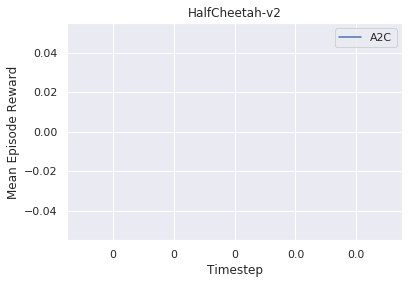

In [4]:
plot = CurvePlot()
plot.add('A2C', y_values, xvalues=x_values)
#plot.add('A2C', [f(y, window_length=51, polyorder=7) for y in y_values], xvalues=x_values)
ax = plot(title=f'{env_id}', 
          xlabel='Timestep', 
          ylabel='Mean Episode Reward', 
          num_tick=6, 
          xscale_magnitude=None)

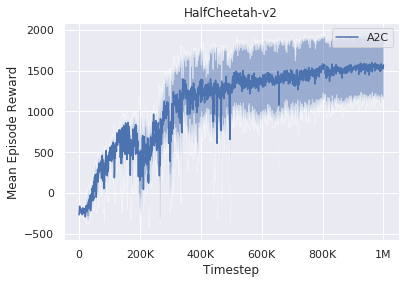

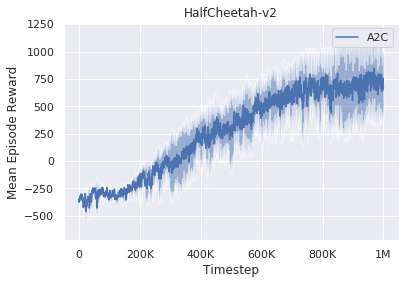

In [5]:
plot = CurvePlot()
plot.add('A2C', y_values, xvalues=x_values)
#plot.add('A2C', [f(y, window_length=51, polyorder=7) for y in y_values], xvalues=x_values)
ax = plot(title=f'{env_id}', 
          xlabel='Timestep', 
          ylabel='Mean Episode Reward', 
          num_tick=6, 
          xscale_magnitude=None)

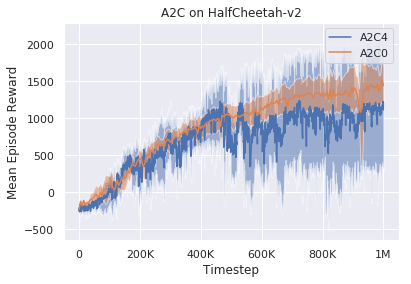

In [344]:
ax = plot(title=f'A2C on {env_id}', 
          xlabel='Timestep', 
          ylabel='Mean Episode Reward', 
          num_tick=6, 
          xscale_magnitude=None)

In [9]:
ax.figure.savefig('data/result.png')